# [프로젝트1] 번호판 인식기

## 조건 및 내용

[할 일]

1. 사진에서 자동차 번호판 부분에 라벨링
2. 번호판의 글자 인식하기


[사용기술]

1. 노이즈 제거: GaussianBlur
2. 이미지 명확하게 하기: adaptive Thresholding
3. 윤곽선 찾기: findContours


[사용할 라이브러리]

* cv2, numpy, matplotlib, pytesseract(이미지에서 글씨를 읽어내는 라이브러리)

[관련자료 다운로드 사이트]

* 한글 데이터: https://github.com/tesseract-ocr/tessdata/blob/main/kor.traineddata

* 테슬렉트 사이트: https://github.com/tesseract-ocr/tesseract

## 관련 기술

[문자인식]

* 이미지에 있는 문자를 문자열로 반환하는 기능
* OCR(Optical Character Recognition)의 약자로 사람이 쓰거나 기계로 인쇄한 문자의 영상을 이미지 스캐너로 획득하여 기계가 읽을 수 있는 문자로 변환하는 것을 의미
* 테슬렉트(Tesseract): 다양한 운영 체제를 위한 광학 문자 인식 엔진이다.

* python에서 사용하기 위해서는 사전작업이 필요하다.
    - pytesseract install: pip install pytesseract
    - tesseract: 설치가 필요함
    
    
[설치 및 설정]

0) pip install cmake

1) tesseract 다운로드 사이트: 

    - https://github.com/UB-Mannheim/tesseract/wiki
    
     <img src="data/note/tess1.jpg" width=500>
     :자신의 OS 버전에 맞는 tesseract 실행파일을 다운로드 받아 실행해서 설치한다.
     
2) pytesseract 다운로드 및 설치

    - pip install pytesseract
    
    
3) path 설정(?)

   - tesseract의 경로밑에 tessdata에 다운로드 받은 trained data를 옮겨준다.
   
   - 아래 코드를 pytesseract.image_to_string() 메소드 위에 추가한다.
        - pytesseract.pytesseract.tesseract_cmd = '본인 tesseract 경로/tesseract.exe'


## 필요한 라이브러리 로딩

In [1]:
# 필요한 라이브러리를 로딩한다. cv2, numpy, matplotlib.pyplot,pytesseract

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
plt.style.use('dark_background')

## 파일 읽기와 전처리

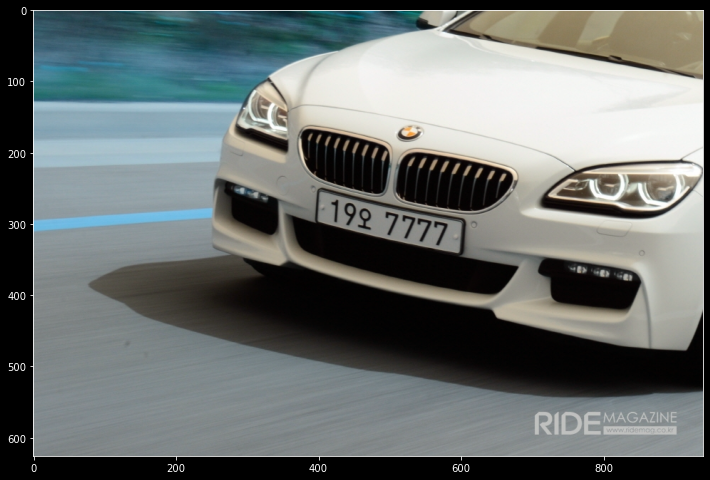

In [2]:
# 사용할 이미지를 불러온다.

ori_img=cv2.imread("data/num_1.jpg")

# 나중에 사용하기 위해 이미지에서 필요한 정보들을 불러다 변수에 저장한다.
# 이미지에서 정보를 불러오는 명령어는 IMAGE.shape 
height, width, channel = ori_img.shape

#출력해본다.
plt.figure(figsize=(12, 10))
plt.imshow(ori_img, cmap='gray')

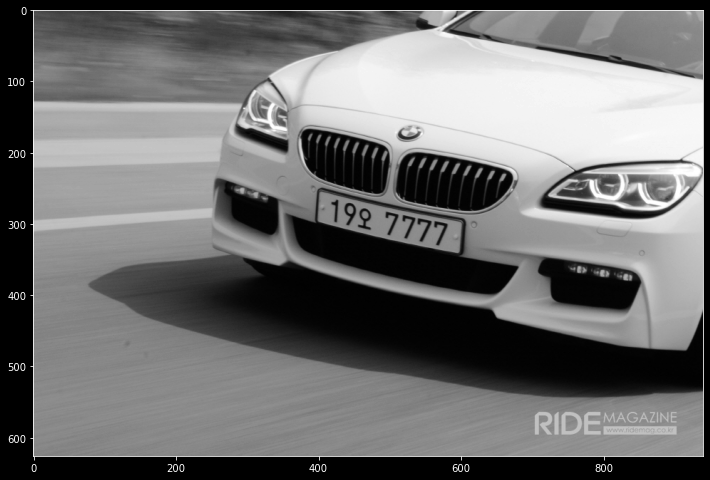

In [3]:
# 이미지 프로세싱이 용이 하도록 그레이 스케일로 바꾼다.

gray=cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)


# 불러온 이미지를 gray 컬러로 출력한다.


plt.figure(figsize=(12, 10))
plt.imshow(gray, cmap='gray')

## Maximize Contrast (Optional)

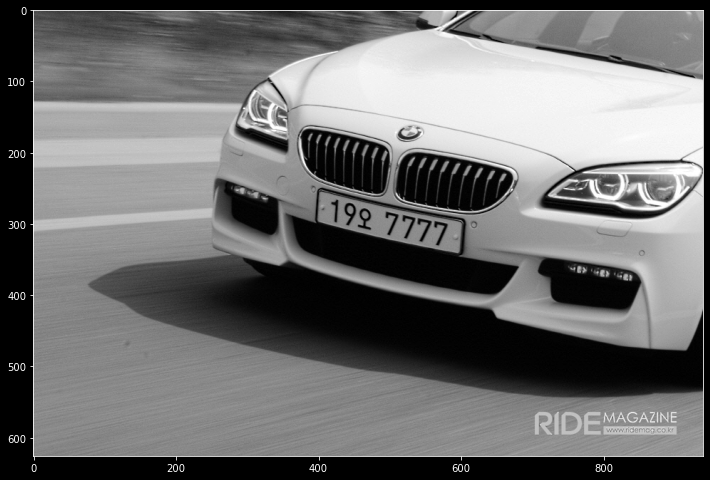

In [4]:
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

imgTopHat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, structuringElement)
imgBlackHat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuringElement)

imgGrayscalePlusTopHat = cv2.add(gray, imgTopHat)
gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

plt.figure(figsize=(12, 10))
plt.imshow(gray, cmap='gray')

## Adaptive Thresholding 적용

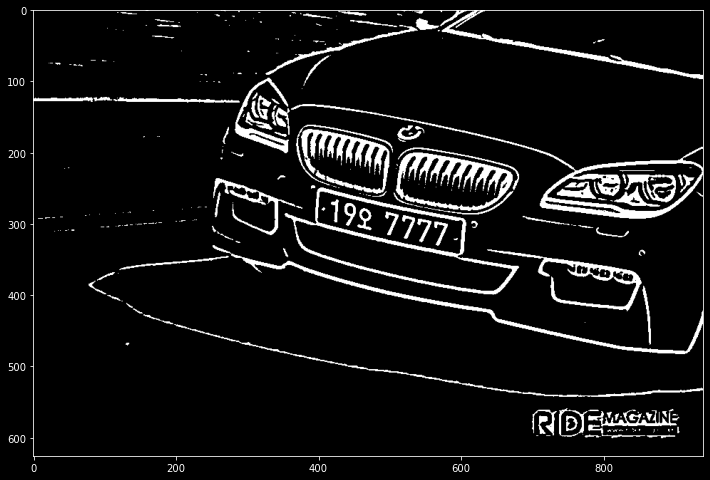

In [5]:
# 노이즈를 줄이기 위해 가우시안블러 사용:  cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)
img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

# Adaptive Thresholding 을 적용해서 선을 선명하게 만든다: 
# 주요옵션: maxValue=255.0, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv2.THRESH_BINARY_INV, blockSize=19, C=9
img_thresh = cv2.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)

plt.figure(figsize=(12, 10))
plt.imshow(img_thresh, cmap='gray')

## 윤곽선 찾기

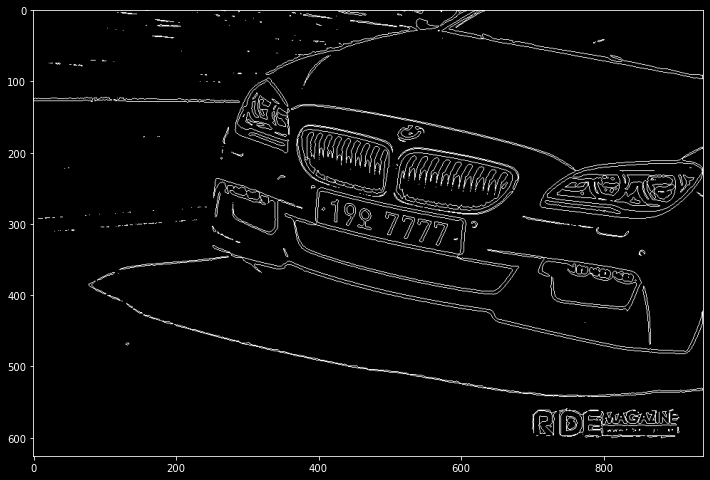

In [6]:
#threshold를 적용한 이미지에서 윤곽선들을 선 형태로 찾아준다.

#opencv에서 findcontours를 사용해서 윤곽선을 찾고, drawcontrous를 사용해서 그린다.

# findContours의 주요옵션: mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE
contours,_ = cv2.findContours(
    img_thresh, 
    mode=cv2.RETR_LIST, 
    method=cv2.CHAIN_APPROX_SIMPLE
)

# 배경이미지 지우기
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

# drawcontrous로 윤곽선을 그린다.
# cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255, 255, 255)) 
cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255, 255, 255))

# 그린 윤곽선을 포함한 정리된 이미지를 화면에 출력한다.

plt.figure(figsize=(12, 10))
plt.imshow(temp_result)


## 데이터 준비

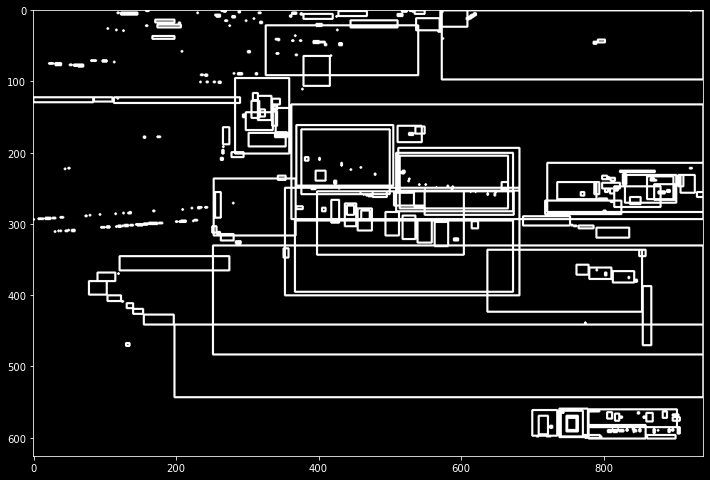

In [7]:
# 번호판을 찾기 쉽도록 데이터 전처리
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

# 윤곽선에서 모든 객체의 윤곽선을 포함하는 선을 그리기 위한 값들을 담을 빈 리스트를 정의한다.
contours_dict = []

# contour를 감싸는 사각형을 구해서 (x, y, w,h)와 중심점을 구해서 리스트에 넣는다.
# 구한 리스트를 기반으로 감싸는 사각형을 그린다.

#for문을 수행하면서 윤곽선을 boundingRect함수를 사용해서 외곽선을 그린다.
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(temp_result, pt1=(x, y), pt2=(x+w, y+h), color=(255, 255, 255), thickness=2)
    
    # 윤곽선에 대한 데이터를 입력한다. (x,y), w, h, 중심점(cx,cy)
    contours_dict.append({
        'contour': contour,
        'x': x,
        'y': y,
        'w': w,
        'h': h,
        'cx': x + (w / 2),#중심의 x값
        'cy': y + (h / 2) #중심의 y값
    })

    # 화면에 출력한다.
plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')

## 문자 사이즈의 후보군을 선택

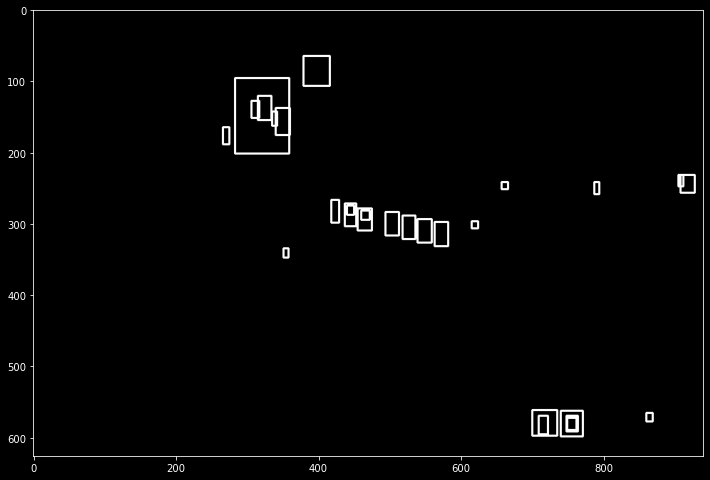

In [8]:
# 번호판의 가로 길이의 최소값과 글자의 너비와 높이를 대략적인 값을 할당한다.
MIN_AREA = 80
MIN_WIDTH, MIN_HEIGHT = 2, 8
MIN_RATIO, MAX_RATIO = 0.25, 1.0

possible_contours = []

# 박스들을 돌면서 비교해서 결정
cnt = 0
for d in contours_dict:
    area = d['w'] * d['h']
    ratio = d['w'] / d['h']
    
    #인덱스를 같이 저장해서 나중에 같이 사용
    if area > MIN_AREA \
    and d['w'] > MIN_WIDTH and d['h'] > MIN_HEIGHT \
    and MIN_RATIO < ratio < MAX_RATIO:
        d['idx'] = cnt
        cnt += 1
        possible_contours.append(d)
        
# 가능성있는 윤곽선들을 모두 그린다.
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for d in possible_contours:
#     cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
    cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')

## 윤곽선 할당 후보 선택

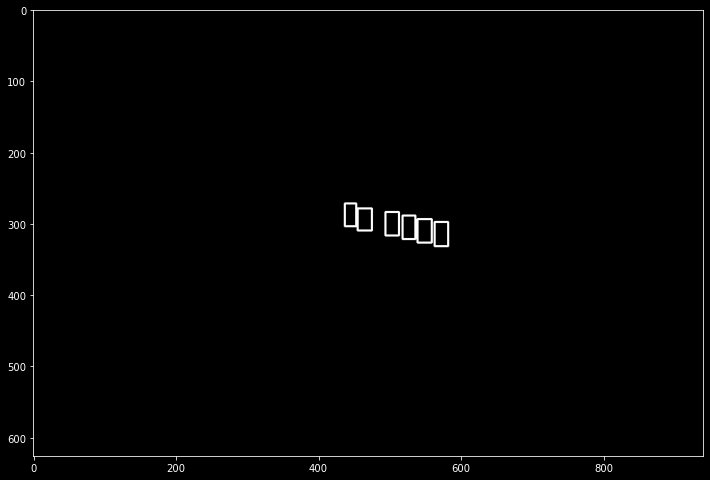

In [9]:
#윤곽선과 윤곽선 사이의 길이를 제한(중심끼리의 길이가 5배)
MAX_DIAG_MULTIPLYER = 5 # 5

# 윤곽선과 윤곽선의 중심점끼리 연결했을때 기울기의 최대값
MAX_ANGLE_DIFF = 12.0 # 12.0

# 두 윤곽선 사이의 면적차가 심하지 않게
MAX_AREA_DIFF = 0.5 # 0.5

#두 윤곽선 사이의 너비차가 심하지 않게
MAX_WIDTH_DIFF = 0.8

#두 윤곽선 사이의 높이차가 심하지 않게
MAX_HEIGHT_DIFF = 0.2

#윤곽선끼리 모여있는 수가 3개 이상인 경우만
MIN_N_MATCHED = 3 # 3

#반복 찾기 위해서,
def find_chars(contour_list):
    # 최종 인덱스 값을 저장해서 사용
    matched_result_idx = []
    
    # 윤곽선 두개를 돌면서 비교할건데, 
    for d1 in contour_list:
        matched_contours_idx = []
        for d2 in contour_list:
            if d1['idx'] == d2['idx']: #둘이 같은 인덱스이면 같은 것이므로 생략
                continue

            dx = abs(d1['cx'] - d2['cx'])
            dy = abs(d1['cy'] - d2['cy'])

            diagonal_length1 = np.sqrt(d1['w'] ** 2 + d1['h'] ** 2)

            # 둘사이의 거리 구하는 함수
            distance = np.linalg.norm(np.array([d1['cx'], d1['cy']]) - np.array([d2['cx'], d2['cy']]))
            if dx == 0: # 같은 dx값을 갖는다. 이므로 0으로 나누지 않게 번호판 확율이 없는 케이스로 치부한다. 
                angle_diff = 90
            else:
                angle_diff = np.degrees(np.arctan(dy / dx))# 라디안을 도로 바꿈
            area_diff = abs(d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h'])
            width_diff = abs(d1['w'] - d2['w']) / d1['w']
            height_diff = abs(d1['h'] - d2['h']) / d1['h']

            if distance < diagonal_length1 * MAX_DIAG_MULTIPLYER \
            and angle_diff < MAX_ANGLE_DIFF and area_diff < MAX_AREA_DIFF \
            and width_diff < MAX_WIDTH_DIFF and height_diff < MAX_HEIGHT_DIFF:
                matched_contours_idx.append(d2['idx'])

        # append this contour
        matched_contours_idx.append(d1['idx'])

        if len(matched_contours_idx) < MIN_N_MATCHED:
            continue
            
# 번호판이라고 생각되는 것들만 넣은것
        matched_result_idx.append(matched_contours_idx)
    
#한번더 찾아본다.
        unmatched_contour_idx = []
    
        for d4 in contour_list:
            if d4['idx'] not in matched_contours_idx:
                unmatched_contour_idx.append(d4['idx'])

        unmatched_contour = np.take(possible_contours, unmatched_contour_idx)
        
        # recursive
        recursive_contour_list = find_chars(unmatched_contour)
        
        for idx in recursive_contour_list:
            matched_result_idx.append(idx)

        break

    return matched_result_idx
    
result_idx = find_chars(possible_contours)

# 번호판의 글씨라고 예측되는 결과값들을 넣어두는 리스트를 정의한다.
matched_result = []

for idx_list in result_idx:
    matched_result.append(np.take(possible_contours, idx_list))

# 완전히 찾은 윤곽선을 그려준다.
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for r in matched_result:
    for d in r:
#         cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
        cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')

## 회전, 평편화 이미지

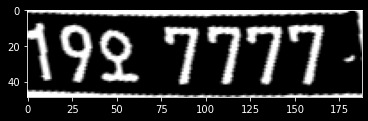

In [10]:
PLATE_WIDTH_PADDING = 1.3 # 1.3
PLATE_HEIGHT_PADDING = 1.5 # 1.5
MIN_PLATE_RATIO = 3
MAX_PLATE_RATIO = 10

plate_imgs = []
plate_infos = []

for i, matched_chars in enumerate(matched_result):
    sorted_chars = sorted(matched_chars, key=lambda x: x['cx'])

    plate_cx = (sorted_chars[0]['cx'] + sorted_chars[-1]['cx']) / 2
    plate_cy = (sorted_chars[0]['cy'] + sorted_chars[-1]['cy']) / 2
    
    plate_width = (sorted_chars[-1]['x'] + sorted_chars[-1]['w'] - sorted_chars[0]['x']) * PLATE_WIDTH_PADDING
    
    sum_height = 0
    for d in sorted_chars:
        sum_height += d['h']

    plate_height = int(sum_height / len(sorted_chars) * PLATE_HEIGHT_PADDING)
    
    triangle_height = sorted_chars[-1]['cy'] - sorted_chars[0]['cy']
    triangle_hypotenus = np.linalg.norm(
        np.array([sorted_chars[0]['cx'], sorted_chars[0]['cy']]) - 
        np.array([sorted_chars[-1]['cx'], sorted_chars[-1]['cy']])
    )
    # 번호판의 기울어진 각도를 계산한다.
    angle = np.degrees(np.arcsin(triangle_height / triangle_hypotenus))
    
    # 비뚤어진 이미지를 돌려본다.
    rotation_matrix = cv2.getRotationMatrix2D(center=(plate_cx, plate_cy), angle=angle, scale=1.0)
    
    img_rotated = cv2.warpAffine(img_thresh, M=rotation_matrix, dsize=(width, height))

    #번호판 이미지만 자른다.
    img_cropped = cv2.getRectSubPix(
        img_rotated, 
        patchSize=(int(plate_width), int(plate_height)), 
        center=(int(plate_cx), int(plate_cy))
    )
    
    if img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO or img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO > MAX_PLATE_RATIO:
        continue
    
    plate_imgs.append(img_cropped)
    plate_infos.append({
        'x': int(plate_cx - plate_width / 2),
        'y': int(plate_cy - plate_height / 2),
        'w': int(plate_width),
        'h': int(plate_height)
    })
    
    plt.subplot(len(matched_result), 1, i+1)
    plt.imshow(img_cropped, cmap='gray')

## 다른 문자 찾기 위한 쓰레시홀딩

In [11]:
longest_idx, longest_text = -1, 0
plate_chars = []

for i, plate_img in enumerate(plate_imgs):
    plate_img = cv2.resize(plate_img, dsize=(0, 0), fx=1.6, fy=1.6)
    _,plate_img = cv2.threshold(plate_img, thresh=0.0, maxval=255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    # find contours again (same as above)
    contours,_ = cv2.findContours(plate_img, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
    
    plate_min_x, plate_min_y = plate_img.shape[1], plate_img.shape[0]
    plate_max_x, plate_max_y = 0,0

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        
        area = w * h
        ratio = w / h

        if area > MIN_AREA \
        and w > MIN_WIDTH and h > MIN_HEIGHT \
        and MIN_RATIO < ratio < MAX_RATIO:
            if x < plate_min_x:
                plate_min_x = x
            if y < plate_min_y:
                plate_min_y = y
            if x + w > plate_max_x:
                plate_max_x = x + w
            if y + h > plate_max_y:
                plate_max_y = y + h
                
    img_result = plate_img[plate_min_y:plate_max_y, plate_min_x:plate_max_x]
  

## 문자인식

19오7777


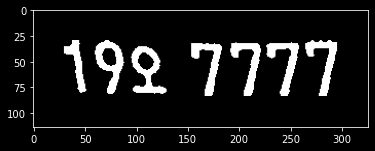

In [14]:
  # tesseract를 설치한다.
  # tessdata에 trained  data를 다운로드 받아 위치를 바꿔준다.
   # img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)
img_result = cv2.GaussianBlur(img_result, ksize=(3, 3), sigmaX=0)
_, img_result = cv2.threshold(img_result, thresh=0.0, maxval=255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_result = cv2.copyMakeBorder(img_result, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))

# 한글 psm: 이미지가 한줄로 나와있다는 의미, oem= 테스렉트 엔진중 가장 옛날 버전: 발전해서 인공지능을 사용가능한데, 0번은 그냥
# korea 트레이닝 데이터를 사용해야 해서 다운로드 받는다.
 
pytesseract.pytesseract.tesseract_cmd='C:/Program Files/Tesseract-OCR/tesseract.exe'
chars = pytesseract.image_to_string(img_result, lang='kor', config='--psm 7 --oem 0')
  
# 숫자가 있는지, 
result_chars = ''
has_digit = False
for c in chars:
    if ord('가') <= ord(c) <= ord('힣') or c.isdigit():
        if c.isdigit():
            has_digit = True
        result_chars += c
    
print(result_chars)
plate_chars.append(result_chars)

# 가장 긴것을 번호판으    if has_digit and len(result_chars) > longest_text:
idx = i

plt.subplot(len(plate_imgs), 1, i+1)
plt.imshow(img_result, cmap='gray')    

## 결과값 출력

19오7777


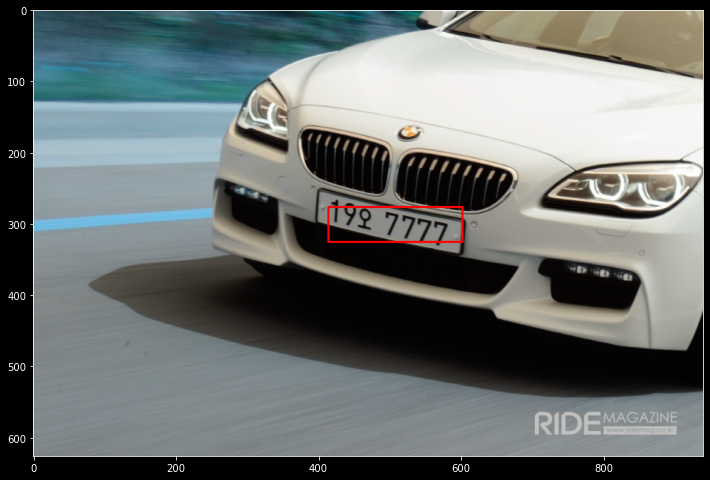

In [15]:
info = plate_infos[longest_idx]
chars = plate_chars[longest_idx]

print(chars)

img_out = ori_img.copy()

cv2.rectangle(img_out, pt1=(info['x'], info['y']), pt2=(info['x']+info['w'], info['y']+info['h']), color=(255,0,0), thickness=2)

cv2.imwrite(chars + '.jpg', img_out)

plt.figure(figsize=(12, 10))
plt.imshow(img_out)

[ Adaptive Thresholding] 에서 노이즈를 제거한 경우와 그대로 사용한 경우의 성능 비교

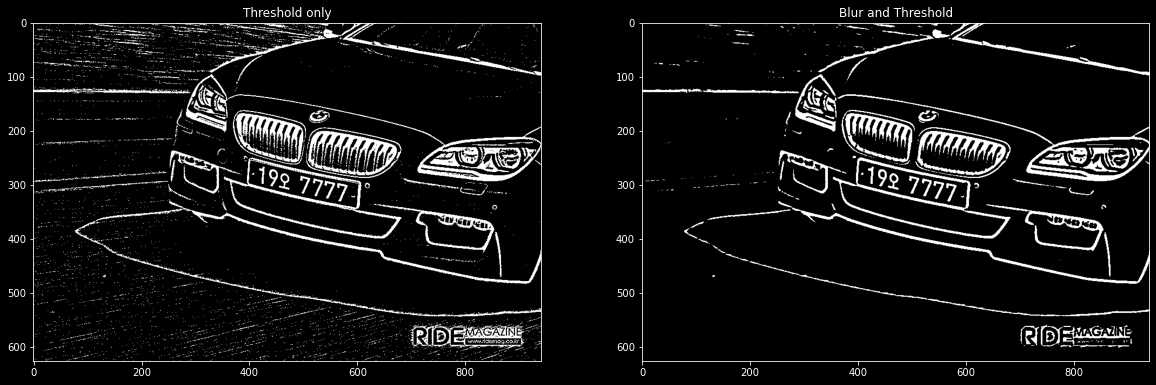

In [16]:
# Thresholding 처리만 한 경우와 잡음 제거+Thresholding 처리를 한 경우를 비교

# threshold only
img_thresh = cv2.adaptiveThreshold(
    gray, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)

# blur and threshold
img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

img_blur_thresh = cv2.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.title('Threshold only')
plt.imshow(img_thresh, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Blur and Threshold')
plt.imshow(img_blur_thresh, cmap='gray')

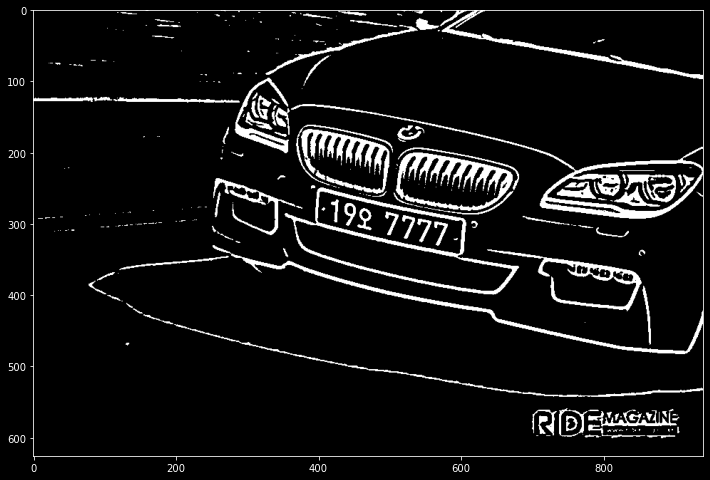

In [17]:
# 노이즈

img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

img_thresh = cv2.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)

plt.figure(figsize=(12, 10))
plt.imshow(img_thresh, cmap='gray')